In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## plot all observations

In [2]:
x = [1,1,0,5,6,4]
y = [4,3,4,1,2,0]

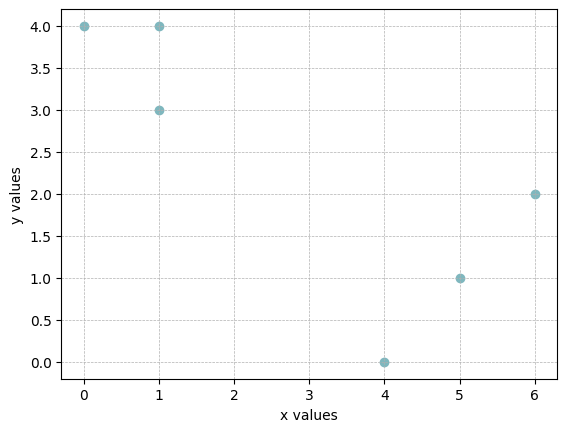

In [3]:
plt.scatter(x, y, c="#7FB7BE")
plt.xlabel("x values")
plt.ylabel("y values")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

## randomly assign cluster label to each observation

In [4]:
colors = ["#e5989b", "#7FB7BE"]
assigned = []

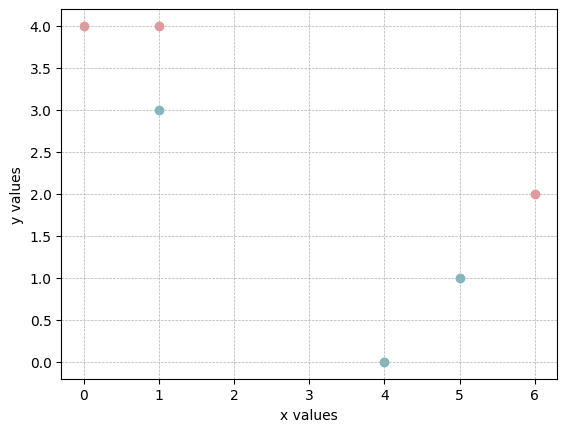

In [5]:
i = 0
for x0, y0 in zip(x, y):
    val = i % 2
    plt.scatter(x0,y0,c = colors[val])
    assigned.append(val+1)
    i += 1
    
plt.xlabel("x values")
plt.ylabel("y values")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

In [6]:
print(assigned)
print(x)
print(y)


[1, 2, 1, 2, 1, 2]
[1, 1, 0, 5, 6, 4]
[4, 3, 4, 1, 2, 0]


In [7]:
def filterAndCentroid(x, y, assigned):
    x_11 = [x[i] for i in range(6) if assigned[i] == 1]
    y_12 = [y[i] for i in range(6) if assigned[i] == 1]
    x_21 = [x[i] for i in range(6) if assigned[i] == 2]
    y_22 = [y[i] for i in range(6) if assigned[i] == 2]

    centroid11 = np.mean(x_11)
    centroid12 = np.mean(y_12)
    centroid21 = np.mean(x_21)
    centroid22 = np.mean(y_22)
    return centroid11, centroid12, centroid21, centroid22

In [8]:
centroid11, centroid12, centroid21, centroid22 = filterAndCentroid(x, y, assigned)

In [9]:
print("cluster 1: (%s, %s)" % (centroid11, centroid12))
print("cluster 2: (%s, %s)" % (centroid21, centroid22))


cluster 1: (2.3333333333333335, 3.3333333333333335)
cluster 2: (3.3333333333333335, 1.3333333333333333)


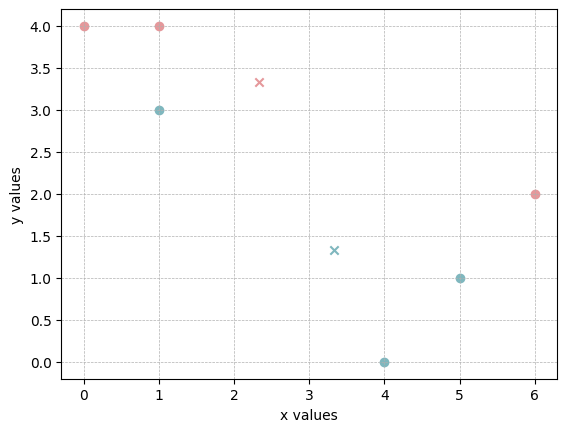

In [10]:
i = 0
for x0, y0 in zip(x, y):
    val = i % 2
    plt.scatter(x0,y0,c = colors[val])
    assigned.append(val+1)
    i += 1
plt.scatter(centroid11, centroid12, c= colors[0], marker="x" )
plt.scatter(centroid21, centroid22, c= colors[1], marker="x")

plt.xlabel("x values")
plt.ylabel("y values")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

In [11]:
def reassign(x, y, centroid11, centroid12, centroid21, centroid22):
    newassign = []
    cluster1 = np.array((centroid11, centroid12))
    cluster2 = np.array((centroid21, centroid22))

    for x1, y1 in zip(x,y):
        #see if it is closer to cluster 1 or cluster 2
        point1 = np.array((x1,y1))
        dist1 = np.sum(np.square(point1 - cluster1))
        dist2 = np.sum(np.square(point1 - cluster2))
        if dist1 < dist2:
            newassign.append(1)
        else:
            newassign.append(2)
            
    return newassign

In [12]:
assigned = reassign(x,y, centroid11, centroid12, centroid21, centroid22)
print(assigned)

[1, 1, 1, 2, 2, 2]


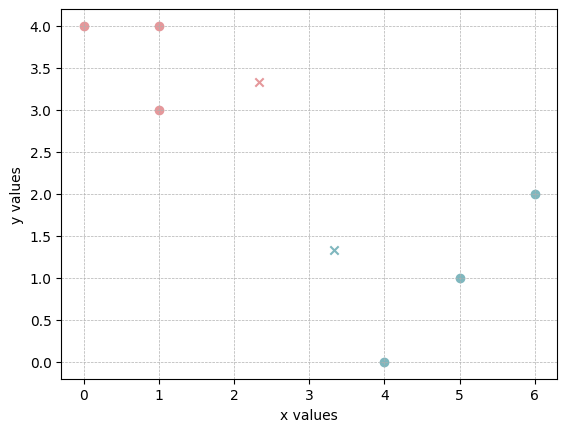

In [13]:
i = 0
for x0, y0 in zip(x, y):
    plt.scatter(x0,y0,c = colors[assigned[i]-1])
    
    i += 1
plt.scatter(centroid11, centroid12, c= colors[0], marker="x" )
plt.scatter(centroid21, centroid22, c= colors[1], marker="x")

plt.xlabel("x values")
plt.ylabel("y values")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

In [14]:
#calculate new centroids
centroid11, centroid12, centroid21, centroid22 = filterAndCentroid(x, y, assigned)


In [15]:
print("(%s, %s)" % (centroid11, centroid12))
print("(%s, %s)" % (centroid21, centroid22))

(0.6666666666666666, 3.6666666666666665)
(5.0, 1.0)


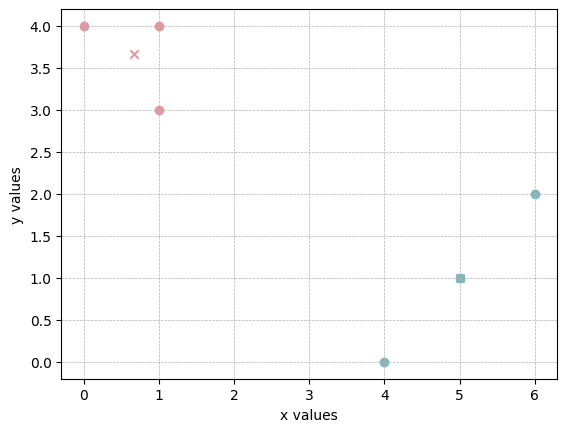

In [16]:
i = 0
for x0, y0 in zip(x, y):
    plt.scatter(x0,y0,c = colors[assigned[i]-1])
    
    i += 1
plt.scatter(centroid11, centroid12, c= colors[0], marker="x" )
plt.scatter(centroid21, centroid22, c= colors[1], marker="x")

plt.xlabel("x values")
plt.ylabel("y values")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

## problem 4

In [1]:
#first set
x1 = [8, 11, 7, 6, 5, 6, 7, 8]
y1 = [0, 0, 0, 0, 1, 1, 1, 1]

#second set
x2 = [x/8 for x in x1]
y2 = [y * 1.25 for y in y1]

#third set
x3 = [0]*8
y3 = [0]*4+[2250]*4 


SyntaxError: invalid syntax. Perhaps you forgot a comma? (2292385579.py, line 7)

In [18]:
#graph the first one:
assigned1 = [1,1,2,2,2,2,1,1]

In [19]:
centroid11, centroid12, centroid21, centroid22 = filterAndCentroid(x1, y1, assigned1)
assigned1 = reassign(x1,y1, centroid11, centroid12, centroid21, centroid22)


In [20]:
centroid11, centroid12, centroid21, centroid22 = filterAndCentroid(x1, y1, assigned1)
assigned1 = reassign(x1,y1, centroid11, centroid12, centroid21, centroid22)

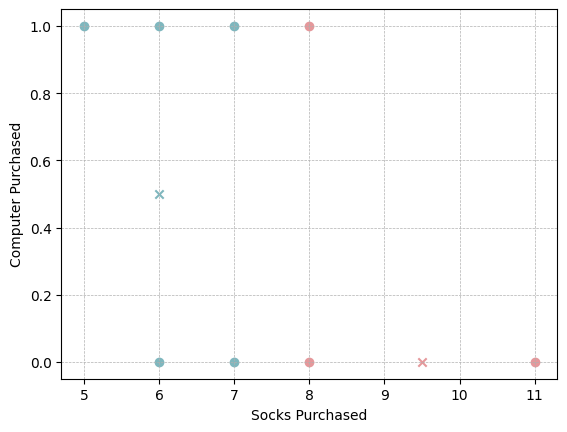

In [21]:
i = 0
for _x, _y in zip(x1, y1):
    plt.scatter(_x,_y, c = colors[assigned1[i]-1])
    i += 1
    
plt.scatter(centroid11, centroid12, c= colors[0], marker="x" )
plt.scatter(centroid21, centroid22, c= colors[1], marker="x")

plt.xlabel("Socks Purchased")
plt.ylabel("Computer Purchased")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

In [22]:
assigned1 = [1,1,2,2,2,2,1,1]


In [23]:
#graph the second one
centroid11, centroid12, centroid21, centroid22 = filterAndCentroid(x2, y2, assigned1)
assigned1 = reassign(x2,y2, centroid11, centroid12, centroid21, centroid22)


In [24]:
centroid11, centroid12, centroid21, centroid22 = filterAndCentroid(x2, y2, assigned1)
assigned1 = reassign(x2,y2, centroid11, centroid12, centroid21, centroid22)

In [25]:
print(assigned1)
for _x,_y, a in zip(x2,y2,assigned1):
    print("(%s, %s) is %s" % (_x, _y,a))

[1, 1, 1, 1, 2, 2, 2, 2]
(1.0, 0.0) is 1
(1.375, 0.0) is 1
(0.875, 0.0) is 1
(0.75, 0.0) is 1
(0.625, 1.3) is 2
(0.75, 1.3) is 2
(0.875, 1.3) is 2
(1.0, 1.3) is 2


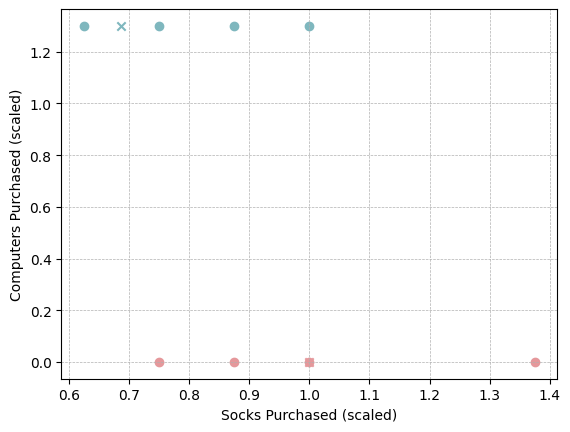

In [26]:
i = 0
for _x, _y in zip(x2, y2):
    plt.scatter(_x,_y, c = colors[assigned1[i]-1])
    i += 1
    
plt.scatter(centroid11, centroid12, c= colors[0], marker="x" )
plt.scatter(centroid21, centroid22, c= colors[1], marker="x")

plt.xlabel("Socks Purchased (scaled)")
plt.ylabel("Computers Purchased (scaled)")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()

In [27]:
centroid11, centroid12, centroid21, centroid22 = filterAndCentroid(x3, y3, assigned1)
assigned1 = reassign(x3,y3, centroid11, centroid12, centroid21, centroid22)

In [28]:
centroid11, centroid12, centroid21, centroid22 = filterAndCentroid(x3, y3, assigned1)
assigned1 = reassign(x3,y3, centroid11, centroid12, centroid21, centroid22)

In [29]:
x3

[0, 0, 0, 0, 0, 0, 0, 0]

In [30]:
y3

[0, 0, 0, 0, 2250, 2250, 2250, 2250]

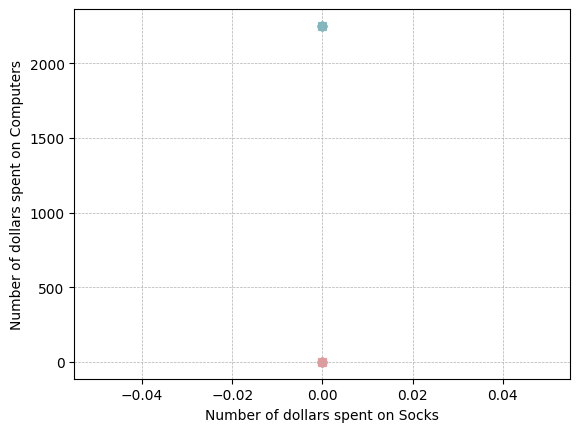

In [31]:
#graph the third one
i = 0
for _x, _y in zip(x3, y3):
    plt.scatter(_x,_y, c = colors[assigned1[i]-1])
    i += 1
    
plt.scatter(centroid11, centroid12, c= colors[0], marker="x" )
plt.scatter(centroid21, centroid22, c= colors[1], marker="x")

plt.xlabel("Number of dollars spent on Socks")
plt.ylabel("Number of dollars spent on Computers")
plt.grid(linestyle = '--', linewidth = 0.5)
plt.show()